<a href="https://colab.research.google.com/github/marciusdm/artigos/blob/main/pycaret/PyCaretClassificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando o PyCaret

In [1]:
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 99.7 MB/

## Importando os pacotes necessários

In [2]:
# importando os pacotes necessários
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model
import pandas as pd

## Coletando os dados

In [3]:
# importar o arquivo
from pycaret.datasets import get_data
# relação de ocupantes do navio titanic, cuja variável alvo é "Survived"
# sobrevivente ou não sobrevivente
df = get_data('titanic')

# ver as primeiras entradas
print("Tamanho de df: {}\n".format(df.shape))

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Tamanho de df: (891, 12)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# separando os dados em teste e treino
test = df.sample(frac=0.10, random_state=1)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
# verificando o formato dos conjuntos
print(train.shape)
print(test.shape)

(802, 12)
(89, 12)


## Criando um pipeline

In [ ]:
# criando o setup do PyCaret
clf = setup(data=train, target='Survived')

,Description,Value
0,Session id,7940
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(802, 12)"
4,Transformed data shape,"(802, 14)"
5,Transformed train set shape,"(561, 14)"
6,Transformed test set shape,"(241, 14)"
7,Ordinal features,1
8,Numeric features,6
9,Categorical features,5


In [5]:
# criando o pipeline
clf = setup(data = train,
            target = 'Survived',
            normalize = True,
            transformation = True,
            session_id=3241, #para garantir a repetibilidade dos resultados
            remove_multicollinearity = True, multicollinearity_threshold = 0.95,
            #log_experiment = True,
            ignore_features=["Name","Ticket","Cabin","PassengerId"],
            experiment_name = 'titanic_01')

,Description,Value
0,Session id,3241
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(802, 12)"
4,Transformed data shape,"(802, 10)"
5,Transformed train set shape,"(561, 10)"
6,Transformed test set shape,"(241, 10)"
7,Ignore features,4
8,Ordinal features,1
9,Numeric features,5


## Comparando os modelos

In [ ]:
# best = compare_models()
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8199,0.8582,0.6998,0.8038,0.7424,0.6061,0.6138,0.2090
knn,K Neighbors Classifier,0.8164,0.8280,0.6959,0.8000,0.7393,0.5995,0.6070,0.1360
rf,Random Forest Classifier,0.8147,0.8423,0.7045,0.7944,0.7392,0.5972,0.6057,0.3070
lightgbm,Light Gradient Boosting Machine,0.8145,0.8505,0.7141,0.7804,0.7419,0.5982,0.6030,0.3180
lr,Logistic Regression,0.8075,0.8588,0.7095,0.7705,0.7337,0.5841,0.5893,0.1270
ada,Ada Boost Classifier,0.8075,0.8449,0.7420,0.7559,0.7438,0.5902,0.5949,0.2040
ridge,Ridge Classifier,0.8004,0.0000,0.7002,0.7648,0.7255,0.5697,0.5757,0.2060
lda,Linear Discriminant Analysis,0.7986,0.8612,0.7002,0.7615,0.7237,0.5663,0.5724,0.1850
xgboost,Extreme Gradient Boosting,0.7967,0.8319,0.7043,0.7466,0.7207,0.5616,0.5658,0.1520
et,Extra Trees Classifier,0.7843,0.8266,0.6764,0.7349,0.6983,0.5321,0.5376,0.5820


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Instanciando o melhor modelo


In [6]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8772,0.8818,0.8182,0.8571,0.8372,0.7387,0.7392
1,0.8571,0.8977,0.7727,0.8500,0.8095,0.6957,0.6977
2,0.8750,0.9044,0.7727,0.8947,0.8293,0.7315,0.7364
3,0.7857,0.8616,0.6818,0.7500,0.7143,0.5435,0.5451
4,0.8214,0.9027,0.6190,0.8667,0.7222,0.5960,0.6143
5,0.7857,0.8537,0.7143,0.7143,0.7143,0.5429,0.5429
6,0.7500,0.7837,0.4762,0.7692,0.5882,0.4227,0.4477
7,0.7679,0.7673,0.5238,0.7857,0.6286,0.4694,0.4898
8,0.8393,0.8925,0.8571,0.7500,0.8000,0.6667,0.6708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# verificando os parâmetros
print(gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3241, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Ajustando os hiperparâmetros

In [ ]:
# tuning de parâmetros
tuned_gbc = tune_model(gbc, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8421,0.8688,0.7727,0.8095,0.7907,0.6640,0.6645
1,0.8393,0.9178,0.7273,0.8421,0.7805,0.6548,0.6592
2,0.8929,0.9037,0.7727,0.9444,0.8500,0.7680,0.7773
3,0.7857,0.8650,0.6818,0.7500,0.7143,0.5435,0.5451
4,0.8036,0.8932,0.5714,0.8571,0.6857,0.5510,0.5750
5,0.7679,0.8340,0.6190,0.7222,0.6667,0.4902,0.4936
6,0.8036,0.8381,0.5714,0.8571,0.6857,0.5510,0.5750
7,0.7679,0.7361,0.4762,0.8333,0.6061,0.4583,0.4944
8,0.8571,0.9156,0.8095,0.8095,0.8095,0.6952,0.6952


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# veriificando os parâmetros
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3241, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


## Plotar o modelo

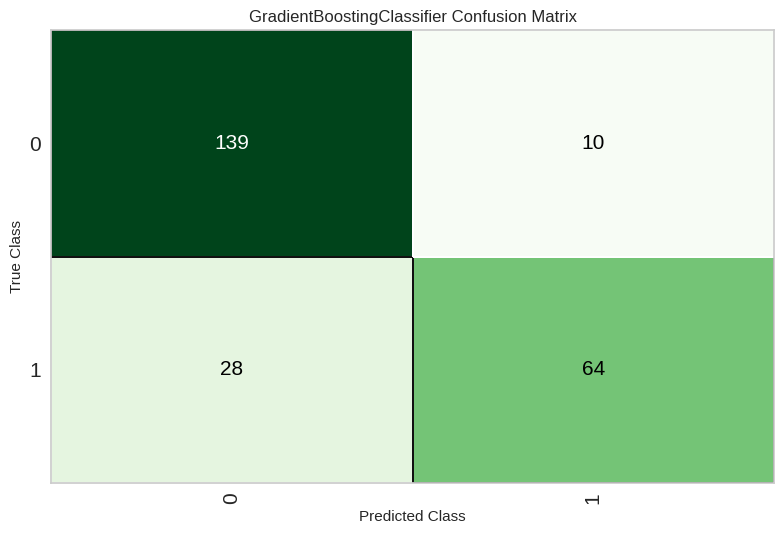

In [ ]:
# plotando matriz de confusão
plot_model(gbc, plot='confusion_matrix')

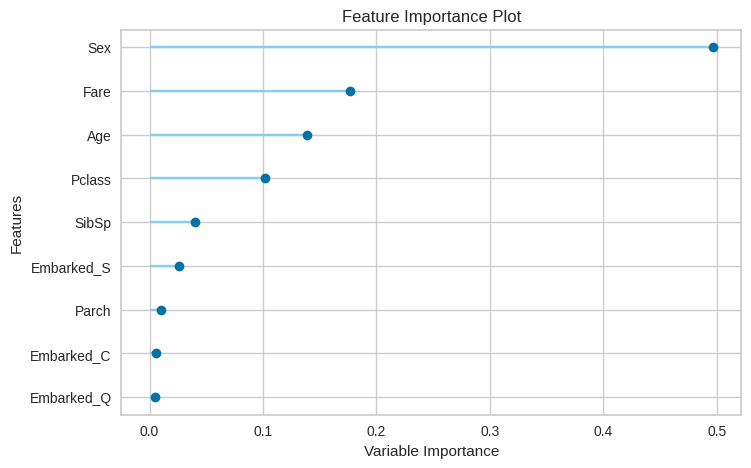

In [ ]:
# feature importances
plot_model(gbc, plot='feature')

In [ ]:
# avaliando o modelo
evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Fazendo previsões

In [ ]:
predict_model(gbc)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8423,0.8367,0.6957,0.8649,0.7711,0.6530,0.6620


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,prediction_label,prediction_score
467,3,male,NaN,0,0,24.150000,Q,0,0,0.8253
170,2,male,19.0,0,0,13.000000,S,0,0,0.8855
747,1,female,62.0,0,0,80.000000,NaN,1,1,0.9701
179,3,male,28.0,0,0,9.500000,S,0,0,0.9107
294,3,female,31.0,1,1,20.525000,S,1,1,0.5202
...,...,...,...,...,...,...,...,...,...,...
637,1,female,18.0,1,0,227.524994,C,1,1,0.9499
372,3,male,44.0,0,0,7.925000,S,1,0,0.9525
35,3,male,NaN,0,0,7.895800,C,0,0,0.8492
691,1,female,36.0,1,2,120.000000,S,1,1,0.9835


A acurácia no conjunto de teste ficou em 0.8423 comparado a 0.8199 na média da validação cruzada.

## Finalizar o modelo

In [7]:
# finalizando o modelo
final_gbc = finalize_model(gbc)

In [ ]:
# verificando os parâmetros
print(final_gbc)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclu...
                                            criterion='friedman_mse', init=None,
 

In [ ]:
# analisando a mudança nos resultados
pred_holdout = predict_model(final_gbc, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8833,0.9445,0.7749,0.9075,0.8360,0.7462,0.7519


## Fazendo previsões em dados novos

In [8]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_gbc, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7528,0.8530,0.5556,0.7692,0.6452,0.4630,0.4774


In [9]:
# previsão em dados não vistos
test_preds.head(10)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
0,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.929199,D17,S,1,1,0.9514
1,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.895800,NaN,S,0,0,0.9119
2,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500000,NaN,S,1,1,0.9516
3,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.137500,NaN,Q,0,1,0.6748
4,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.250000,NaN,S,1,1,0.8744
5,624,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.854200,NaN,S,0,0,0.9157
6,149,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.000000,F2,S,0,0,0.8793
7,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S,1,1,0.9729
8,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.170799,NaN,C,0,1,0.5354
9,242,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.500000,NaN,Q,1,1,0.7459


## Salvando o modelo

In [10]:
#salvando o modelo para uso posterior
save_model(final_gbc, "ModeloGBC-20231017")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclu...
                                             criterion='friedman_mse

## Carregando um modelo

In [11]:
saved_final_gbc = load_model('ModeloGBC-20231017')

Transformation Pipeline and Model Successfully Loaded


In [12]:
# fazendo previsões com o modelo salvo
new_prediction = predict_model(saved_final_gbc, data=test)
new_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7528,0.8530,0.5556,0.7692,0.6452,0.4630,0.4774


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,prediction_label,prediction_score
0,863,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.929199,D17,S,1,1,0.9514
1,224,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.895800,NaN,S,0,0,0.9119
2,85,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.500000,NaN,S,1,1,0.9516
3,681,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.137500,NaN,Q,0,1,0.6748
4,536,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.250000,NaN,S,1,1,0.8744
